In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle

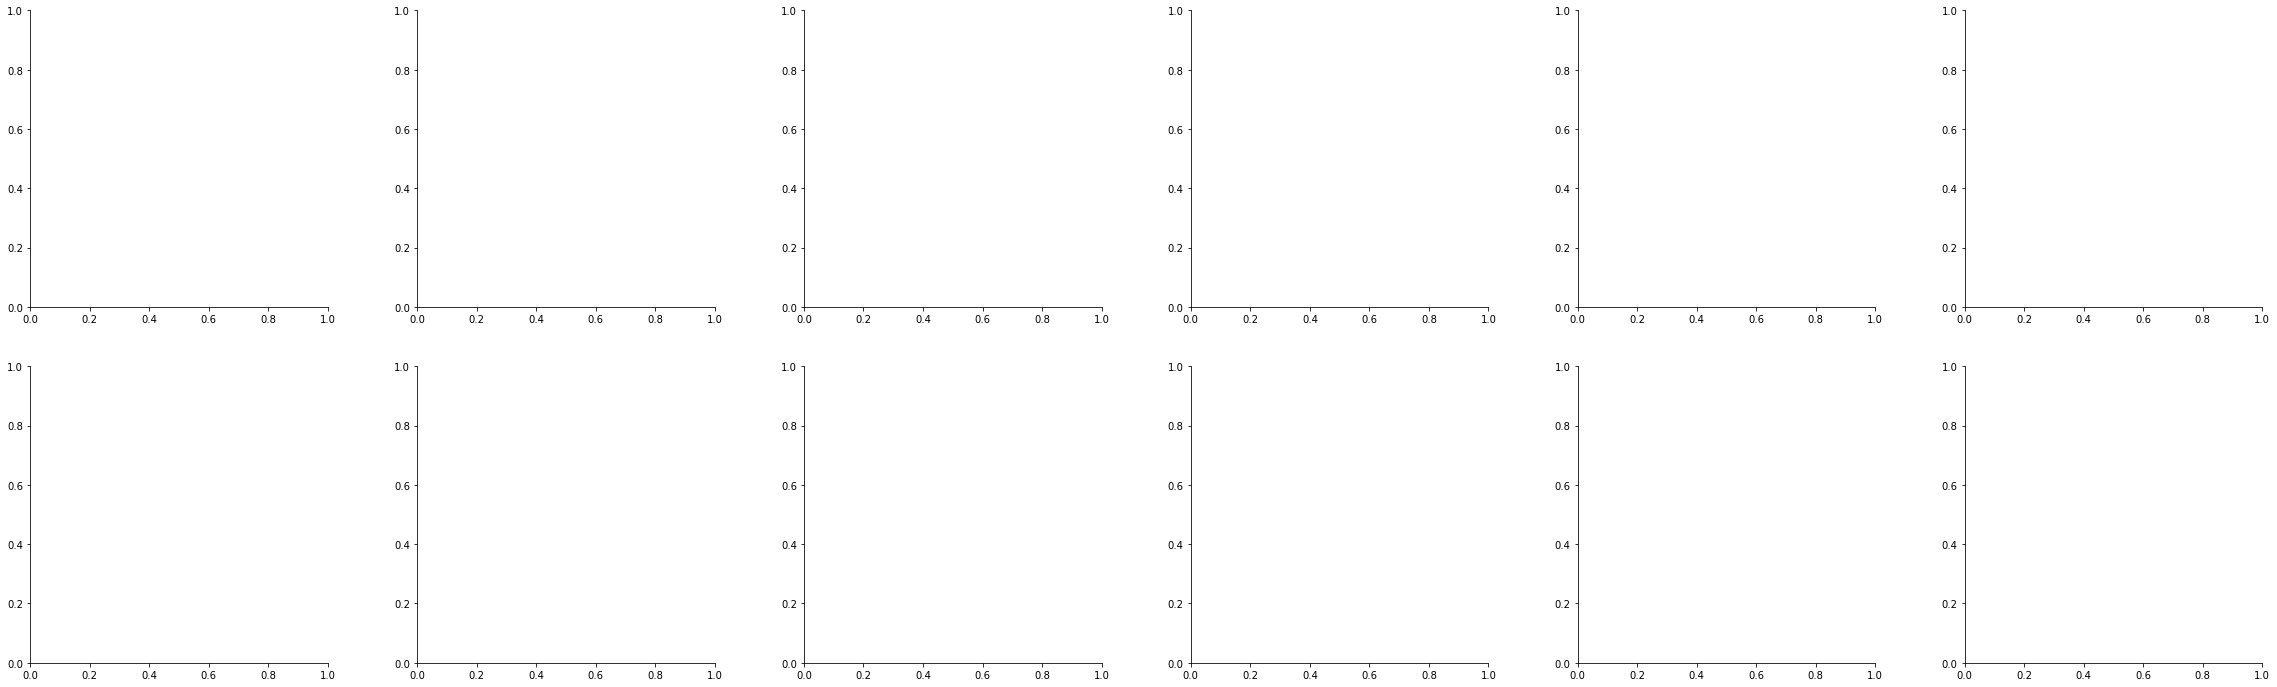

In [10]:
fig, axs = plt.subplots(2, 6, figsize=(40, 12), gridspec_kw={'hspace': 0.2, 'wspace': 0.3})
palette = sns.color_palette('Greys', n_colors=2)
plt.rcParams.update({'font.size': 10})
sns.despine(top=True, right=True)

def avg(lst):
    return sum(lst)/len(lst)
    
def create_legend():
    for ax in axs.flat:
        ax.legend([],[], frameon=False)
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    fig.legend(lines, labels)

def myplot(kind, axs, title):
    if kind == "lat":
        plot_latency(axs, title)
    if kind == "cpu":
        plot_cpu(axs, title)
    if kind == "goodput":
        plot_goodput(axs, title)
    if kind == "cpg":
        plot_cpu_per_goodput(axs, title)

def plot_latency(axs, title):
    results = []
    for e in pq_100:
      results.append([e, "parquet", "100"])
    for e in pq_10:
      results.append([e, "parquet", "10"])
    for e in pq_1:
      results.append([e, "parquet", "1"])
    for e in rpq_100:
      results.append([e, 'rados-parquet', "100"])
    for e in rpq_10:
      results.append([e, 'rados-parquet', "10"])
    for e in rpq_1:
      results.append([e, 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['Duration (s)', 'File Format', 'Selectivity (%)'])
    df[['Duration (s)']] = df[['Duration (s)']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="Duration (s)", hue="File Format", data=df, ci='sd', capsize=.15, errwidth=0.5, ax=axs, palette=palette)
    sns_plot.set(ylim=(0, 200))
    sns_plot.set_title(title, fontdict= { 'fontsize': 10})
    sns_plot.set_xlabel('Selectivity (%)', fontsize=10)
    sns_plot.set_ylabel('Duration (s)', fontsize=10)
    fig.savefig('latency.png', dpi=600)


def plot_cpu(axs, title):
    results = []
    for e in cpu_pq_100:
      results.append([e, "parquet", "100"])
    for e in cpu_pq_10:
      results.append([e, "parquet", "10"])
    for e in cpu_pq_1:
      results.append([e, "parquet", "1"])
    for e in cpu_rpq_100:
      results.append([e, 'rados-parquet', "100"])
    for e in cpu_rpq_10:
      results.append([e, 'rados-parquet', "10"])
    for e in cpu_rpq_1:
      results.append([e, 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['CPU Usage (%)', 'File Format', 'Selectivity (%)'])
    df[['CPU Usage (%)']] = df[['CPU Usage (%)']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="CPU Usage (%)", hue="File Format", data=df, ax=axs, ci='sd', capsize=.15, errwidth=0.5, palette=palette)
    sns_plot.set(ylim=(0, 350000))
    sns_plot.set_title(title, fontdict= { 'fontsize': 10})
    sns_plot.set_xlabel('Selectivity (%)', fontsize=10)
    sns_plot.set_ylabel('CPU Usage', fontsize=10)
    fig.savefig('cpu.png', dpi=600)


def plot_goodput(axs, title):
    results = []
    for e in pq_100:
      results.append([(154.8/e)*1000, "parquet", "100"])
    for e in pq_10:
      results.append([(15.48/e)*1000, "parquet", "10"])
    for e in pq_1:
      results.append([(1.548/e)*1000, "parquet", "1"])
    for e in rpq_100:
      results.append([(154.8/e)*1000, 'rados-parquet', "100"])
    for e in rpq_10:
      results.append([(15.48/e)*1000, 'rados-parquet', "10"])
    for e in rpq_1:
      results.append([(1.548/e)*1000, 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['Goodput (MB/s)', 'File Format', 'Selectivity (%)'])
    df[['Goodput (MB/s)']] = df[['Goodput (MB/s)']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="Goodput (MB/s)", hue="File Format", ci='sd', capsize=.15, errwidth=0.5, data=df, ax=axs, palette=palette)
    sns_plot.set(ylim=(0, 1000))
    sns_plot.set_xlabel('Selectivity (%)', fontsize=10)
    sns_plot.set_ylabel('Goodput (MB/s)', fontsize=10)
    sns_plot.set_title(title, fontdict= { 'fontsize': 10})
    fig.savefig('goodput.png', dpi=600)


def plot_cpu_per_goodput(axs, title):
    results = []
    for e in pq_100:
      results.append([ avg(cpu_pq_100)/((154.8/e)*1000) , "parquet", "100"])
    for e in pq_10:
      results.append([ avg(cpu_pq_10)/((15.48/e)*1000) , "parquet", "10"])
    for e in pq_1:
      results.append([ avg(cpu_pq_1)/((1.548/e)*1000) , "parquet", "1"])
    for e in rpq_100:
      results.append([ avg(cpu_rpq_100)/((154.8/e)*1000) , 'rados-parquet', "100"])
    for e in rpq_10:
      results.append([ avg(cpu_rpq_10)/((15.48/e)*1000) , 'rados-parquet', "10"])
    for e in rpq_1:
      results.append([ avg(cpu_rpq_1)/((1.548/e)*1000) , 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['CPU/Goodput', 'File Format', 'Selectivity (%)'])
    df[['CPU/Goodput']] = df[['CPU/Goodput']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="CPU/Goodput", hue="File Format", data=df, ci='sd', capsize=.15, errwidth=0.5, ax=axs, palette=palette)
    sns_plot.set(ylim=(0, 40000))
    sns_plot.set_title(title, fontdict= { 'fontsize': 10})
    sns_plot.set_xlabel('Selectivity (%)', fontsize=10)
    sns_plot.set_ylabel('CPU/Goodput', fontsize=10)
    fig.savefig('cpu_per_goodput.png', dpi=600)

In [11]:
kind = "cpg"

In [12]:
# 8 Storage Node, 1 OSD/Node, 16 Threads / Client, 128 MB Files

pq_100 = [169.15243077278137, 169.112699508667]
pq_10 = [173.42564606666565, 174.07676649093628]
pq_1 = [172.1171576976776, 172.3305516242981]

rpq_100 = [188.739972114563, 191.93430852890015]
rpq_10 = [149.23388123512268, 146.20489645004272]
rpq_1 = [135.28671789169312, 134.9126899242401]

cpu_pq_100 = [263843.00000000006, 264891.6999999998]
cpu_pq_10 = [270893.1000000001, 275727.4999999999]
cpu_pq_1 = [268909.7, 272758.80000000005]

cpu_rpq_100 = [256137.9, 254576.90000000002]
cpu_rpq_10 = [205200.00000000003, 197926.59999999998]
cpu_rpq_1 = [186142.4, 188281.4]
myplot(kind, axs[0,0], "8 OSDs, 16 Threads, 128 MB")


# 8 Storage Node, 1 OSD/Node, 16 Threads / Client, 64 MB Files

pq_100 = [164.4235508441925, 164.21448945999146, 166.64239311218262]
pq_10 = [171.62123465538025, 172.54202485084534]
pq_1 = [166.97980737686157, 166.61639142036438] 

rpq_100 =  [188.38545656204224, 188.29467248916626, 191.61062955856323]
rpq_10 =  [145.5152871608734, 146.13693237304688, 148.84795331954956]
rpq_1 =  [138.43587708473206, 134.47528719902039, 137.60795211791992]

cpu_pq_100 = [259283.69999999998, 256799.59999999995]
cpu_pq_10 = [266312.0, 265786.69999999995]
cpu_pq_1 = [264289.8, 264556.8]

cpu_rpq_100 = [258803.2, 257837.69999999992]
cpu_rpq_10 = [206540.4, 199520.30000000002]
cpu_rpq_1 = [189037.00000000003, 189356.4]
myplot(kind, axs[0,1], "8 OSDs, 16 Threads, 64 MB")

# 8 Storage Node, 1 OSD/Node, 16 Threads / Client, 32 MB Files

pq_100 =  [164.04311752319336, 164.71105575561523, 165.30222821235657]
pq_10 =  [171.0862216949463, 171.5943477153778, 171.96918034553528]
pq_1 =  [167.86895656585693, 167.99340796470642, 167.8164186477661]

rpq_100 =  [190.61322808265686, 187.15711760520935, 189.0958445072174]
rpq_10 =  [146.4531168937683, 146.73693108558655, 147.23830699920654]
rpq_1 =  [139.36109232902527, 143.53947567939758, 145.81861901283264]

cpu_pq_100 = [262520.1999999999, 259100.1999999999]
cpu_pq_10 = [272915.4999999999, 273304.99999999994]
cpu_pq_1 = [253876.3, 266159.4999999999]

cpu_rpq_100 = [253761.29999999996, 266175.5999999999]
cpu_rpq_10 = [211671.4, 209882.6]
cpu_rpq_1 = [200647.1, 196448.5]
myplot(kind, axs[0,2], "8 OSDs, 16 Threads, 32 MB")


# 8 Storage Node, 1 OSD/Node, 16 Threads / Client, 16 MB Files

pq_100 =  [160.48247241973877, 160.51530599594116, 160.1902413368225]
pq_10 =  [169.73990106582642, 169.73515915870667, 169.64212107658386]
pq_1 =  [164.41596937179565, 164.46942281723022, 164.46043229103088]

rpq_100 =  [196.04388761520386, 194.65109372138977, 195.92302823066711]
rpq_10 =  [153.8925564289093, 154.2043182849884, 155.3293673992157]
rpq_1 =  [153.75060272216797, 155.10130786895752, 160.20520615577698]

cpu_rpq_100 = [275487.39999999997, 278698.80000000005]
cpu_rpq_10 = [224664.1, 230276.3]
cpu_rpq_1 = [221436.0, 211074.5]

cpu_pq_100 = [254230.99999999997, 263799.60000000015]
cpu_pq_10 = [274231.90000000014, 266479.30000000005]
cpu_pq_1 = [265948.9000000001, 257745.1]
myplot(kind, axs[0,3], "8 OSDs, 16 Threads, 16 MB")


# 8 Storage Node, 1 OSD/Node, 16 Threads / Client, 8 MB Files

pq_100 =  [164.3927948474884, 164.20608758926392, 164.0307559967041]
pq_10 =  [172.5649893283844, 172.70362782478333, 172.4267337322235]
pq_1 =  [165.35124111175537, 165.46360564231873, 165.5828149318695]

rpq_100 =  [216.21460223197937, 219.23212575912476, 216.80444622039795]
rpq_10 =  [166.90259790420532, 167.85149145126343, 167.3601622581482]
rpq_1 =  [161.15800595283508, 159.75654768943787, 160.29193663597107]

cpu_pq_100 = [261561.5, 261776.10000000006]
cpu_pq_10 = [274390.0, 275804.9000000001]
cpu_pq_1 = [272299.2, 272100.3000000001]

cpu_rpq_100 = [298133.7, 308650.1]
cpu_rpq_10 = [252309.89999999994, 252728.3]
cpu_rpq_1 = [241162.99999999997, 238136.60000000003]
myplot(kind, axs[0,4], "8 OSDs, 16 Threads, 8 MB")


# 8 Storage Node, 1 OSD/Node, 16 Threads / Client, 4 MB Files

pq_100 =  [167.24241280555725, 167.09871673583984, 166.98175382614136]
pq_10 =  [174.69018173217773, 174.76337480545044, 174.2639422416687]
pq_1 =  [171.33374691009521, 171.36920881271362, 171.47620391845703]

rpq_100 =  [231.44315648078918, 230.18936204910278, 230.00982546806335]
rpq_10 =  [189.67705464363098, 190.1687400341034, 188.59569931030273]
rpq_1 =  [181.9247281551361, 182.05710649490356, 182.55694031715393]

cpu_rpq_100 = [348255.7, 349551.29999999993]
cpu_rpq_10 = [283149.30000000005, 285856.69999999995]
cpu_rpq_1 = [273192.20000000007, 271808.19999999995]

cpu_pq_100 = [263730.89999999985, 264836.4000000002]
cpu_pq_10 = [276214.6000000002, 275129.4]
cpu_pq_1 = [272784.9000000001, 272736.9000000002]
myplot(kind, axs[0,5], "8 OSDs, 16 Threads, 4 MB")


# 16 Storage Node, 1 OSD/Node, 16 Threads / Client, 128 MB Files

pq_100 =  [170.5183539390564, 170.77954244613647]
pq_10 =  [177.87509298324585, 178.49709463119507]
pq_1 =  [171.93189764022827, 171.41377091407776]

rpq_100 =  [181.20040583610535, 179.6959035396576]
rpq_10 =  [124.38749074935913, 124.40836930274963]
rpq_1 = [117.91224431991577, 117.96249961853027]

cpu_pq_100 = [250143.19999999995, 255843.6]
cpu_pq_10 = [254934.6, 250057.80000000005]
cpu_pq_1 = [258021.00000000006, 258611.90000000008]

cpu_rpq_100 = [266253.19999999995, 255964.80000000002]
cpu_rpq_10 = [187040.39999999997, 185740.59999999998]
cpu_rpq_1 = [180566.0, 181344.8]
myplot(kind, axs[1,0], "16 OSDs, 16 Threads, 128 MB")


# 16 Storage Node, 1 OSD/Node, 16 Threads / Client, 64 MB Files

rpq_100 =  [179.2794623374939, 178.95786881446838, 177.24089860916138]
rpq_10 =  [125.25144791603088, 127.4243369102478, 127.54957747459412]
rpq_1 =  [119.81761837005615, 121.83231329917908, 121.60974717140198]

pq_100 =  [168.30642437934875, 168.55226135253906, 168.11410546302795]
pq_10 =  [171.04640364646912, 170.47853684425354]
pq_1 =  [169.27107119560242, 169.42862462997437]

cpu_rpq_100 = [244784.00000000003, 245921.29999999996]
cpu_rpq_10 = [190382.99999999997, 186881.9, 193194.6]
cpu_rpq_1 = [177112.09999999998, 170329.09999999998]

cpu_pq_100 = [253376.1, 255180.10000000012]
cpu_pq_10 = [274418.9000000002, 264886.6]
cpu_pq_1 = [266799.0000000001, 253898.09999999995]
myplot(kind, axs[1,1], "16 OSDs, 16 Threads, 64 MB")


# 16 Storage Node, 1 OSD/Node, 16 Threads / Client, 32 MB Files

rpq_100 =  [182.22803711891174, 181.41394138336182, 182.29459738731384]
rpq_10 =  [132.62156438827515, 132.50055837631226, 132.44143199920654]
rpq_1 =  [125.62461376190186, 126.04543375968933, 134.30333042144775]

pq_100 =  [162.47264981269836, 162.45478582382202, 162.3949363231659]
pq_10 =  [171.1746072769165, 171.51235365867615, 171.42948698997498]
pq_1 =  [166.56505060195923, 166.73383736610413, 166.6482014656067]

cpu_rpq_100 = [265733.69999999995, 267599.9]
cpu_rpq_10 = [199775.59999999998, 200495.4]
cpu_rpq_1 = [189397.89999999997, 189344.0]

cpu_pq_100 = [243002.6999999999, 243227.9999999999]
cpu_pq_10 = [243193.49999999994, 243395.0]
cpu_pq_1 = [243404.19999999987, 244197.39999999997]
myplot(kind, axs[1,2], "16 OSDs, 16 Threads, 32 MB")


# 16 Storage Node, 1 OSD/Node, 16 Threads / Client, 16 MB Files

rpq_100 =  [188.48323130607605, 191.22524499893188, 191.21820545196533]
rpq_10 =  [140.32705211639404, 145.55951118469238, 139.85064220428467]
rpq_1 =  [134.02679991722107, 132.91915893554688, 133.6236126422882]

pq_100 =  [160.87672781944275, 162.8957097530365]
pq_10 =  [170.41891384124756, 170.1641924381256, 170.39744877815247]
pq_1 =  [165.799067735672, 166.2384593486786, 165.40405416488647]

cpu_rpq_100 = [266771.60000000003, 269000.0]
cpu_rpq_10 = [212911.2, 213202.4]
cpu_rpq_1 = [206709.39999999997, 207268.30000000002]

cpu_pq_100 = [257452.99999999994, 254065.09999999992]
cpu_pq_10 = [270148.3, 271510.2999999999]
cpu_pq_1 = [260555.7, 251526.40000000002]
myplot(kind, axs[1,3], "16 OSDs, 16 Threads, 16 MB")


# 16 Storage Node, 1 OSD/Node, 16 Threads / Client, 8 MB Files

rpq_100 =  [211.38915872573853, 211.2655634880066, 212.3792381286621]
rpq_10 =  [157.2700650691986, 157.21930813789368, 156.83574032783508]
rpq_1 =  [150.3045837879181, 150.50208234786987, 150.05729484558105]

pq_100 =  [166.0257875919342, 165.72976398468018]
pq_10 =  [172.41858386993408, 172.50582313537598]
pq_1 =  [169.9910011291504, 169.93193197250366]

cpu_rpq_100 = [308442.10000000003, 299227.0000000001]
cpu_rpq_10 = [243244.6, 242349.6]
cpu_rpq_1 = [229123.09999999998, 233363.59999999995]

cpu_pq_100 = [263520.0999999999, 263137.30000000016]
cpu_pq_10 = [277749.19999999995, 280816.3]
cpu_pq_1 = [268829.10000000003, 265036.1]
myplot(kind, axs[1,4], "16 OSDs, 16 Threads, 8 MB")


# 16 Storage Node, 1 OSD/Node, 16 Threads / Client, 4 MB Files

rpq_100 =  [223.12653279304504, 225.4572558403015, 222.83066821098328]
rpq_10 =  [178.1344075202942, 176.73607635498047, 177.85867738723755]
rpq_1 =  [170.6693024635315, 171.70645213127136, 170.76082944869995]

pq_100 =  [165.66048622131348, 166.27443552017212]
pq_10 =  [173.32840490341187, 173.56372356414795]
pq_1 =  [169.4763400554657, 169.5264630317688]

cpu_rpq_100 = [339586.89999999997, 343224.19999999995] 
cpu_rpq_10 = [282315.49999999994, 280218.6]
cpu_rpq_1 = [280218.6, 269638.99999999994]

cpu_pq_100 = [265178.1000000001, 270655.40000000014] 
cpu_pq_10 = [277351.8999999999, 278311.4000000001] 
cpu_pq_1 = [270440.1000000001, 271966.4000000001]
myplot(kind, axs[1,5], "16 OSDs, 16 Threads, 4 MB")